<a href="https://colab.research.google.com/github/umamah333/Enhanced-MRI-Analysis-for-Brain-Tumour-Classification-using-Machine-Learning/blob/main/project_initial_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Unzipping and viewing the contents**

In [1]:
#mounting the google drive because dataset is loaded in the drive for easy access and
#further processing

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
#making seperate file for unzipping the contents of the dataset in the folder
!mkdir -p "/content/drive/My Drive/brain_tumor_dataset"

In [3]:
#unzipping the dataset
!unzip "/content/drive/My Drive/brain tumour dataset.zip" -d "/content/drive/My Drive/brain_tumor_dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/brain_tumor_dataset/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/drive/My Drive/brain_tumor_dataset/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/drive/My Drive/brain_tumor_dataset/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/drive/My Drive/brain_tumor_dataset/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/drive/My Drive/brain_tumor_dataset/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/drive/My Drive/brain_tumor_dataset/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/drive/My Drive/brain_tumor_dataset/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/drive/My Drive/brain_tumor_dataset/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/drive/My Drive/brain_tumor_dataset/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/drive/My Drive/brain_tumor_dataset/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/drive/My Drive/brain_tumor_

In [4]:

# Count the number of directories
num_dirs = !find "/content/drive/My Drive/brain_tumor_dataset" -type d | wc -l
print(f"Number of directories: {num_dirs[0]}")

# Count the number of files
num_files = !find "/content/drive/My Drive/brain_tumor_dataset" -type f | wc -l
print(f"Number of files: {num_files[0]}")

# Count the number of images (jpg and png)
num_images = !find "/content/drive/My Drive/brain_tumor_dataset" -type f \( -iname \*.jpg -o -iname \*.png \) | wc -l
print(f"Number of images: {num_images[0]}")

Number of directories: 11
Number of files: 7023
Number of images: 7023


In [5]:
# List top-level directories
print("Top-level directories:")
!ls -d "/content/drive/My Drive/brain_tumor_dataset/*/"

# List all directories recursively
print("\nAll directories recursively:")
!find "/content/drive/My Drive/brain_tumor_dataset" -type d

Top-level directories:
ls: cannot access '/content/drive/My Drive/brain_tumor_dataset/*/': No such file or directory

All directories recursively:
/content/drive/My Drive/brain_tumor_dataset
/content/drive/My Drive/brain_tumor_dataset/Testing
/content/drive/My Drive/brain_tumor_dataset/Testing/glioma
/content/drive/My Drive/brain_tumor_dataset/Testing/meningioma
/content/drive/My Drive/brain_tumor_dataset/Testing/notumor
/content/drive/My Drive/brain_tumor_dataset/Testing/pituitary
/content/drive/My Drive/brain_tumor_dataset/Training
/content/drive/My Drive/brain_tumor_dataset/Training/glioma
/content/drive/My Drive/brain_tumor_dataset/Training/meningioma
/content/drive/My Drive/brain_tumor_dataset/Training/notumor
/content/drive/My Drive/brain_tumor_dataset/Training/pituitary


# **loading Libraries**

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from PIL import Image
from tqdm import tqdm
import cv2
import imutils
import random
import shutil



# **Exploring the Data Structures**

In [7]:
base_dir = "/content/drive/My Drive/brain_tumor_dataset"
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

train_categories = os.listdir(train_dir)
test_categories = os.listdir(test_dir)

print("Training categories:", train_categories)
print("Testing categories:", test_categories)

for category in train_categories:
    print(f"{category} has {len(os.listdir(os.path.join(train_dir, category)))} images in the training set")
for category in test_categories:
    print(f"{category} has {len(os.listdir(os.path.join(test_dir, category)))} images in the testing set")


Training categories: ['glioma', 'meningioma', 'notumor', 'pituitary']
Testing categories: ['glioma', 'meningioma', 'notumor', 'pituitary']
glioma has 1321 images in the training set
meningioma has 1339 images in the training set
notumor has 1595 images in the training set
pituitary has 1457 images in the training set
glioma has 300 images in the testing set
meningioma has 306 images in the testing set
notumor has 405 images in the testing set
pituitary has 300 images in the testing set


Image: Tr-glTr_0000.jpg | Size: (512, 512)
Image: Tr-glTr_0001.jpg | Size: (512, 512)
Image: Tr-glTr_0002.jpg | Size: (512, 512)
Image: Tr-glTr_0003.jpg | Size: (512, 512)
Image: Tr-glTr_0004.jpg | Size: (512, 512)
Image: Tr-meTr_0000.jpg | Size: (512, 512)
Image: Tr-meTr_0001.jpg | Size: (512, 512)
Image: Tr-meTr_0002.jpg | Size: (512, 512)
Image: Tr-meTr_0003.jpg | Size: (512, 512)
Image: Tr-meTr_0004.jpg | Size: (512, 512)
Image: Tr-noTr_0000.jpg | Size: (350, 350)
Image: Tr-noTr_0001.jpg | Size: (350, 350)
Image: Tr-noTr_0002.jpg | Size: (605, 613)
Image: Tr-noTr_0003.jpg | Size: (562, 592)
Image: Tr-noTr_0004.jpg | Size: (442, 442)
Image: Tr-piTr_0000.jpg | Size: (512, 512)
Image: Tr-piTr_0001.jpg | Size: (512, 512)
Image: Tr-piTr_0002.jpg | Size: (512, 512)
Image: Tr-piTr_0003.jpg | Size: (512, 512)
Image: Tr-piTr_0004.jpg | Size: (512, 512)


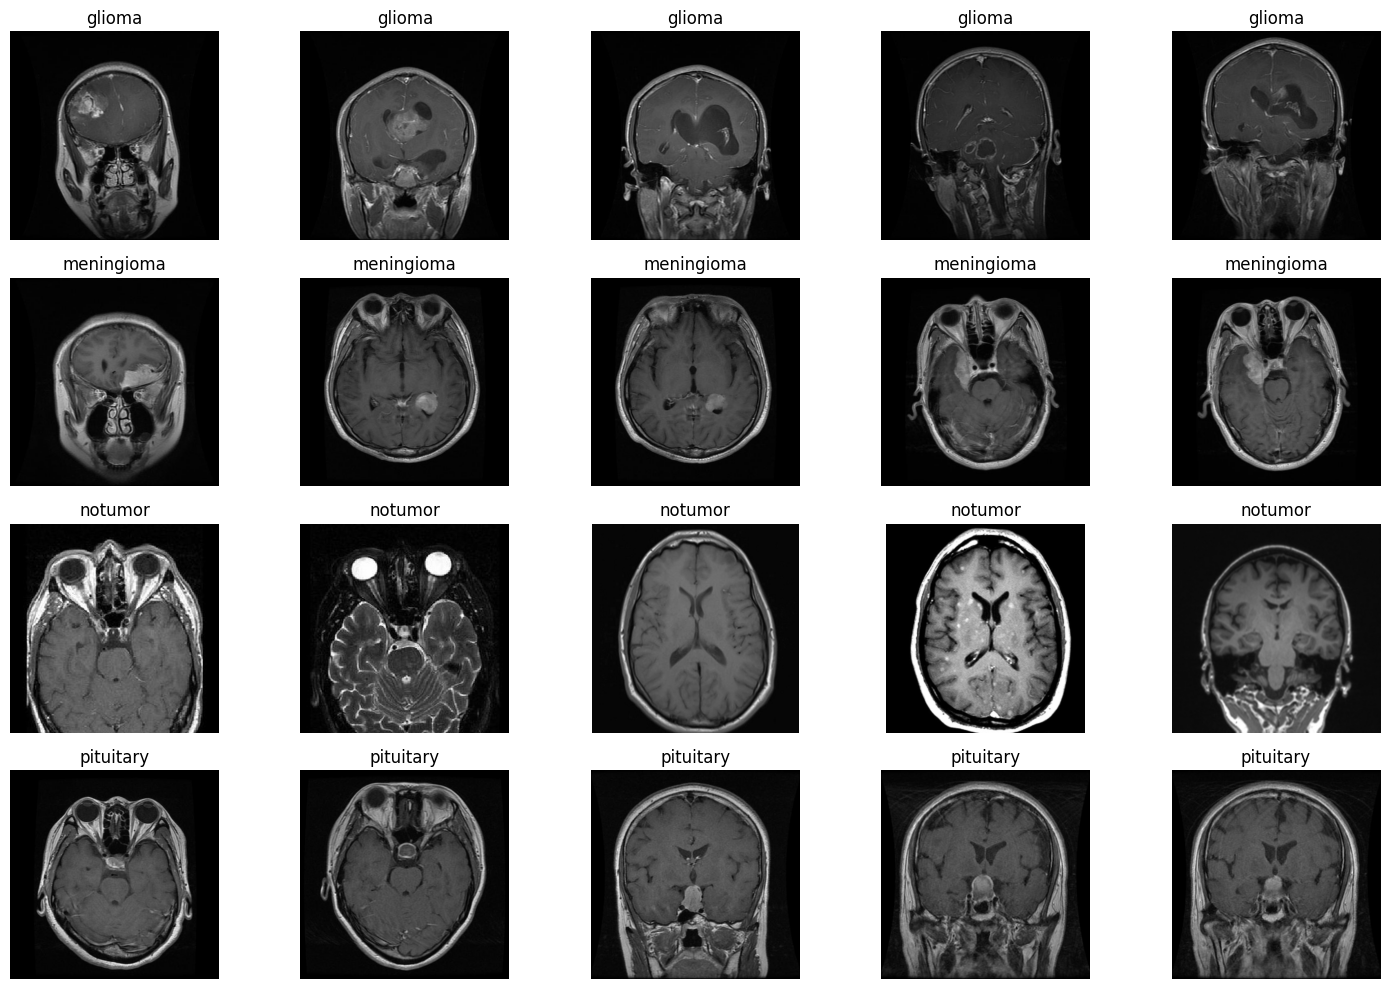

In [8]:
#function for viewing the dataset images for better understanding

def plot_sample_images(base_dir, categories, n=5):
    """
    Plots sample images from each category in the specified base directory and prints their sizes.

    Parameters:
    base_dir (str): The base directory containing category folders.
    categories (list of str): List of category names (subdirectory names).
    n (int): Number of sample images to display from each category. Default is 5.

    The function will create a plot with sample images from each category for visualization and print their sizes.
    """
    plt.figure(figsize=(15, 10))
    for i, category in enumerate(categories):
        folder_path = os.path.join(base_dir, category)
        for j, img_name in enumerate(os.listdir(folder_path)[:n]):
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path)
            plt.subplot(len(categories), n, i * n + j + 1)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')
            print(f"Image: {img_name} | Size: {img.size}")  # Print image size (width, height)
    plt.tight_layout()
    plt.show()

plot_sample_images(train_dir, train_categories)


# **Data Pre-processing**

the images in the dataset are of different sizes ,so we will implement a technique the crop images to equal sizes for better
performance.

In [9]:


def crop_img(img):
    """
    Finds the extreme points on the image and crops the rectangular region out of them.
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convert the image to grayscale
    gray = cv2.GaussianBlur(gray, (3, 3), 0)  # Apply Gaussian blur to the grayscale image

    # Threshold the image, then perform erosions and dilations to remove small noise regions
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in the thresholded image and grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    # Find the extreme points of the largest contour
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    ADD_PIXELS = 0

    # Crop the image based on the extreme points
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

    return new_img

def process_images(input_dir, output_dir, img_size=256):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for category in os.listdir(input_dir):
        category_path_input = os.path.join(input_dir, category)
        category_path_output = os.path.join(output_dir, category)

        if not os.path.exists(category_path_output):
            os.makedirs(category_path_output)

        for img_name in os.listdir(category_path_input):
            img_path_input = os.path.join(category_path_input, img_name)
            image = cv2.imread(img_path_input)
            if image is not None:
                new_img = crop_img(image)
                new_img = cv2.resize(new_img, (img_size, img_size))
                img_path_output = os.path.join(category_path_output, img_name)
                cv2.imwrite(img_path_output, new_img)

if __name__ == "__main__":

    output_training_dir = "cleaned/Training"
    output_testing_dir = "cleaned/Testing"

    process_images(train_dir, output_training_dir)
    process_images(test_dir, output_testing_dir)


Image: Tr-gl_1188.jpg | Size: (256, 256)
Image: Tr-gl_0877.jpg | Size: (256, 256)
Image: Tr-gl_1123.jpg | Size: (256, 256)
Image: Tr-gl_0329.jpg | Size: (256, 256)
Image: Tr-gl_0382.jpg | Size: (256, 256)
Image: Tr-me_1038.jpg | Size: (256, 256)
Image: Tr-me_0410.jpg | Size: (256, 256)
Image: Tr-me_0083.jpg | Size: (256, 256)
Image: Tr-me_0231.jpg | Size: (256, 256)
Image: Tr-me_0435.jpg | Size: (256, 256)
Image: Tr-no_0971.jpg | Size: (256, 256)
Image: Tr-no_1565.jpg | Size: (256, 256)
Image: Tr-no_0816.jpg | Size: (256, 256)
Image: Tr-no_1275.jpg | Size: (256, 256)
Image: Tr-no_1412.jpg | Size: (256, 256)
Image: Tr-pi_0397.jpg | Size: (256, 256)
Image: Tr-pi_0469.jpg | Size: (256, 256)
Image: Tr-pi_0565.jpg | Size: (256, 256)
Image: Tr-pi_0958.jpg | Size: (256, 256)
Image: Tr-pi_1422.jpg | Size: (256, 256)


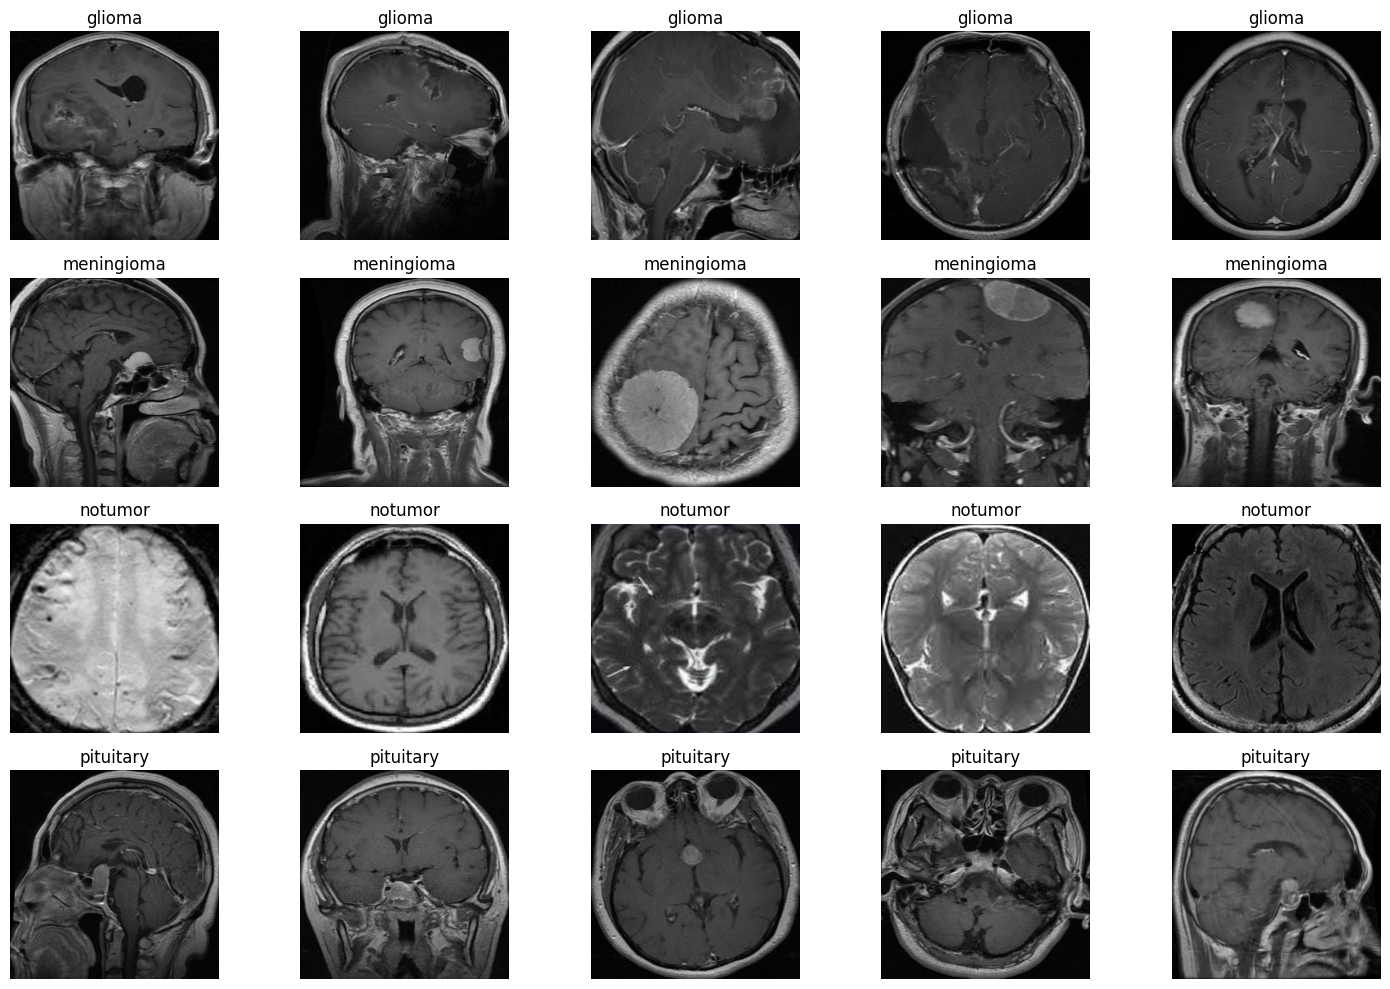

In [10]:
#function for viewing the dataset images for better understanding

def plot_sample_images(base_dir, categories, n=5):
    """
    Plots sample images from each category in the specified base directory and prints their sizes.

    Parameters:
    base_dir (str): The base directory containing category folders.
    categories (list of str): List of category names (subdirectory names).
    n (int): Number of sample images to display from each category. Default is 5.

    The function will create a plot with sample images from each category for visualization and print their sizes.
    """
    plt.figure(figsize=(15, 10))
    for i, category in enumerate(categories):
        folder_path = os.path.join(base_dir, category)
        for j, img_name in enumerate(os.listdir(folder_path)[:n]):
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path)
            plt.subplot(len(categories), n, i * n + j + 1)
            plt.imshow(img)
            plt.title(category)
            plt.axis('off')
            print(f"Image: {img_name} | Size: {img.size}")  # Print image size (width, height)
    plt.tight_layout()
    plt.show()

plot_sample_images(output_training_dir, train_categories)

# **Exploratory Data Analysis**

Exploring the processed dataset through EDA is crucial to grasp its contents thoroughly. This step helps detect and address potential biases and ensures all data categories are adequately represented. By analyzing the dataset, we gain insights into class distributions, assess category balance, and identify any anomalies that could impact algorithm development. This proactive approach ensures our dataset mirrors real-world scenarios, enhancing the reliability of our machine learning models. EDA guides decisions on data preprocessing, feature engineering, and model selection, setting a strong foundation for accurate brain tumor classification and segmentation.

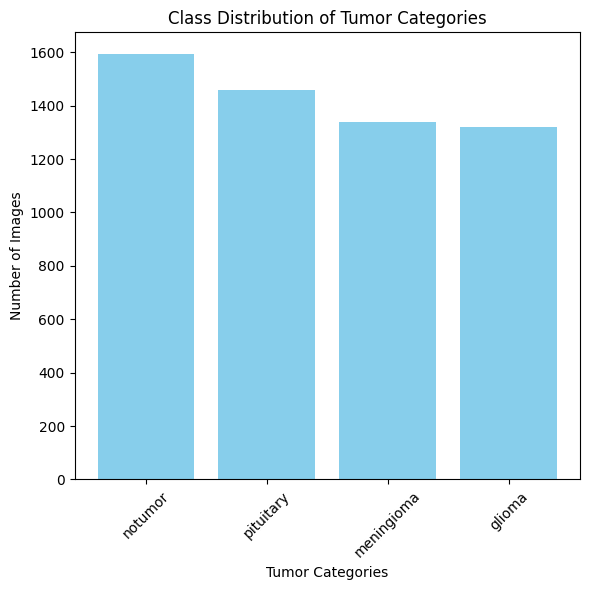

In [11]:
def plot_class_distribution(dataset_dir):
    """
    Plots the distribution of images across different tumor categories in the dataset.

    Parameters:
    dataset_dir (str): Directory path containing subdirectories for each tumor category.
    """
    categories = os.listdir(dataset_dir)
    category_counts = []

    for category in categories:
        category_path = os.path.join(dataset_dir, category)
        if os.path.isdir(category_path):
            num_images = len(os.listdir(category_path))
            category_counts.append((category, num_images))

    category_counts.sort(key=lambda x: x[1], reverse=True)  # Sort categories by number of images

    categories, counts = zip(*category_counts)

    plt.figure(figsize=(6, 6))
    plt.bar(categories, counts, color='skyblue')
    plt.xlabel('Tumor Categories')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution of Tumor Categories')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


dataset_dir = 'cleaned/Training'
plot_class_distribution(dataset_dir)

Category: meningioma
Mean Pixel Value: 68.57615028022384
Standard Deviation of Pixel Values: 44.77550894696511
Minimum Pixel Value: 0
Maximum Pixel Value: 255

Category: notumor
Mean Pixel Value: 89.77823929263506
Standard Deviation of Pixel Values: 54.12784684816836
Minimum Pixel Value: 0
Maximum Pixel Value: 255

Category: pituitary
Mean Pixel Value: 61.949515893186046
Standard Deviation of Pixel Values: 37.953422958466774
Minimum Pixel Value: 0
Maximum Pixel Value: 255

Category: glioma
Mean Pixel Value: 56.28941563527572
Standard Deviation of Pixel Values: 35.90628528686301
Minimum Pixel Value: 0
Maximum Pixel Value: 255



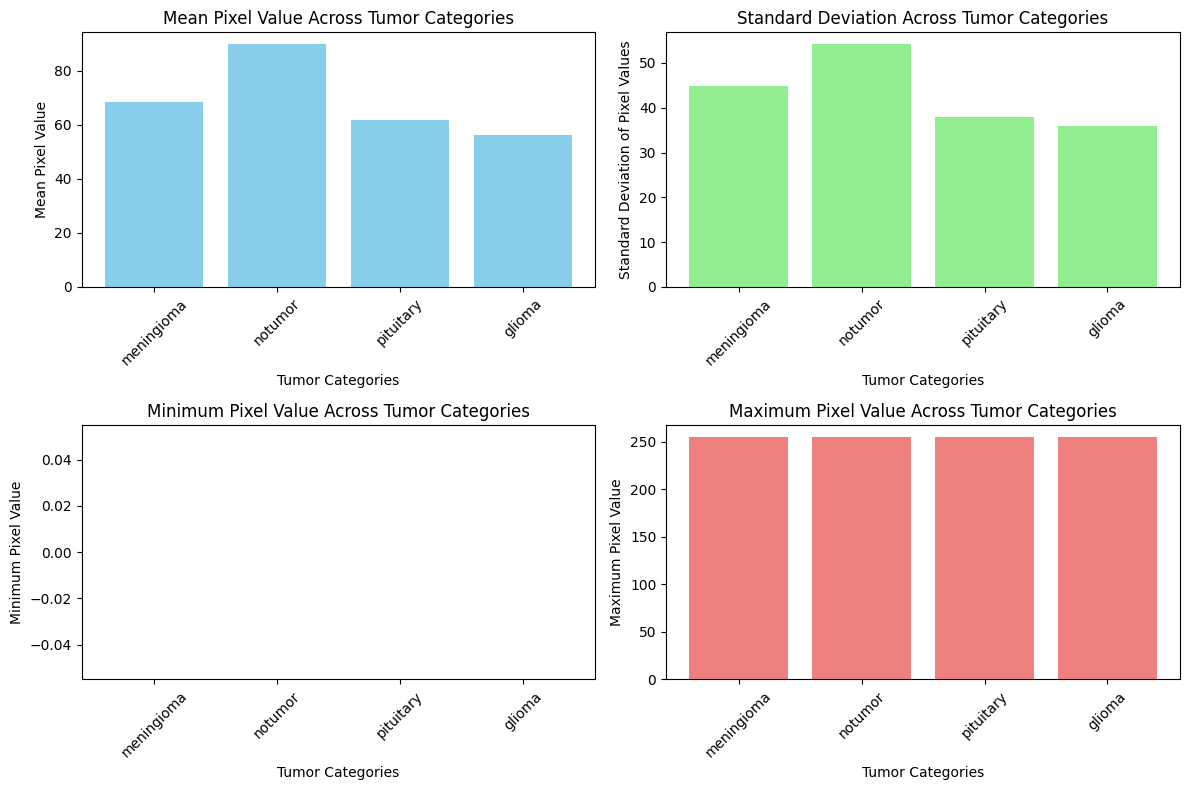

In [12]:


def calculate_image_statistics(dataset_dir):
    """
    Calculates statistical metrics (mean, std deviation, range) of pixel values within images in the dataset.

    Parameters:
    dataset_dir (str): Directory path containing subdirectories for each tumor category.

    Returns:
    dict: Dictionary containing statistical metrics (mean, std_dev, min_value, max_value) for each image category.
    """
    categories = os.listdir(dataset_dir)
    category_statistics = {}

    for category in categories:
        category_path = os.path.join(dataset_dir, category)
        if os.path.isdir(category_path):
            image_stats = {
                'mean': [],
                'std_dev': [],
                'min_value': [],
                'max_value': []
            }

            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    mean_value = np.mean(img)
                    std_dev_value = np.std(img)
                    min_value = np.min(img)
                    max_value = np.max(img)

                    image_stats['mean'].append(mean_value)
                    image_stats['std_dev'].append(std_dev_value)
                    image_stats['min_value'].append(min_value)
                    image_stats['max_value'].append(max_value)

            category_statistics[category] = {
                'mean': np.mean(image_stats['mean']),
                'std_dev': np.mean(image_stats['std_dev']),
                'min_value': np.min(image_stats['min_value']),
                'max_value': np.max(image_stats['max_value'])
            }

    return category_statistics

def plot_statistics(stats):
    """
    Plot graphical representation of image statistics.

    Parameters:
    stats (dict): Dictionary containing statistical metrics for each image category.
    """
    categories = list(stats.keys())
    mean_values = [stats[cat]['mean'] for cat in categories]
    std_dev_values = [stats[cat]['std_dev'] for cat in categories]
    min_values = [stats[cat]['min_value'] for cat in categories]
    max_values = [stats[cat]['max_value'] for cat in categories]

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.bar(categories, mean_values, color='skyblue')
    plt.xlabel('Tumor Categories')
    plt.ylabel('Mean Pixel Value')
    plt.title('Mean Pixel Value Across Tumor Categories')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 2)
    plt.bar(categories, std_dev_values, color='lightgreen')
    plt.xlabel('Tumor Categories')
    plt.ylabel('Standard Deviation of Pixel Values')
    plt.title('Standard Deviation Across Tumor Categories')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 3)
    plt.bar(categories, min_values, color='salmon')
    plt.xlabel('Tumor Categories')
    plt.ylabel('Minimum Pixel Value')
    plt.title('Minimum Pixel Value Across Tumor Categories')
    plt.xticks(rotation=45)

    plt.subplot(2, 2, 4)
    plt.bar(categories, max_values, color='lightcoral')
    plt.xlabel('Tumor Categories')
    plt.ylabel('Maximum Pixel Value')
    plt.title('Maximum Pixel Value Across Tumor Categories')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

dataset_dir = 'cleaned/Training'
stats = calculate_image_statistics(dataset_dir)

# Print the calculated statistics
for category, stat in stats.items():
    print(f"Category: {category}")
    print(f"Mean Pixel Value: {stat['mean']}")
    print(f"Standard Deviation of Pixel Values: {stat['std_dev']}")
    print(f"Minimum Pixel Value: {stat['min_value']}")
    print(f"Maximum Pixel Value: {stat['max_value']}")
    print()

# Plot the statistics graphically
plot_statistics(stats)


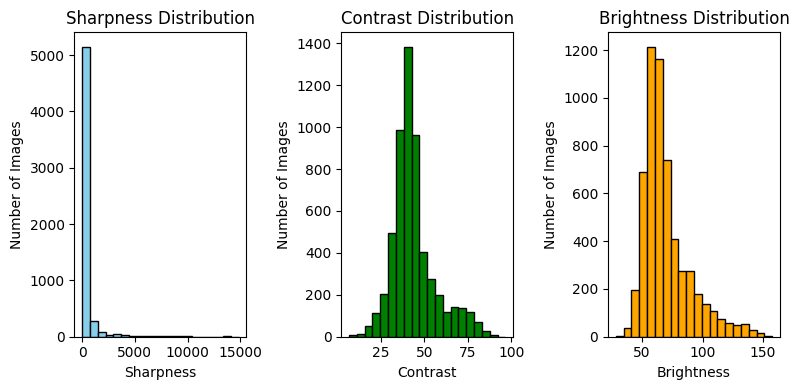

In [13]:

def calculate_image_quality_metrics(img_path):
    """
    Calculates image quality metrics including sharpness, contrast, and brightness.

    Parameters:
    img_path (str): Path to the image file.

    Returns:
    dict: Dictionary containing image quality metrics.
    """
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read image as grayscale
    if img is None:
        raise ValueError(f"Unable to read image: {img_path}")

    # Calculate sharpness (high frequency content)
    laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
    sharpness = laplacian_var

    # Calculate contrast (pixel intensity range)
    contrast = np.std(img)

    # Calculate brightness (mean pixel value)
    brightness = np.mean(img)

    metrics = {
        'sharpness': sharpness,
        'contrast': contrast,
        'brightness': brightness
    }

    return metrics

def analyze_image_quality(dataset_dir):
    """
    Analyzes image quality metrics (sharpness, contrast, brightness) for images in a dataset directory.

    Parameters:
    dataset_dir (str): Directory containing image files.

    Returns:
    dict: Dictionary containing image quality metrics for each image file.
    """
    sharpness_values = []
    contrast_values = []
    brightness_values = []

    for category in os.listdir(dataset_dir):
        category_path = os.path.join(dataset_dir, category)
        if os.path.isdir(category_path):
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                try:
                    metrics = calculate_image_quality_metrics(img_path)
                    sharpness_values.append(metrics['sharpness'])
                    contrast_values.append(metrics['contrast'])
                    brightness_values.append(metrics['brightness'])
                except Exception as e:
                    print(f"Error processing {img_path}: {str(e)}")

    return sharpness_values, contrast_values, brightness_values


dataset_dir = 'cleaned/Training'  # Replace with your dataset directory
sharpness_values, contrast_values, brightness_values = analyze_image_quality(dataset_dir)

# Plotting
plt.figure(figsize=(8, 4))

# Plot sharpness
plt.subplot(1, 3, 1)
plt.hist(sharpness_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Sharpness Distribution')
plt.xlabel('Sharpness')
plt.ylabel('Number of Images')

# Plot contrast
plt.subplot(1, 3, 2)
plt.hist(contrast_values, bins=20, color='green', edgecolor='black')
plt.title('Contrast Distribution')
plt.xlabel('Contrast')
plt.ylabel('Number of Images')

# Plot brightness
plt.subplot(1, 3, 3)
plt.hist(brightness_values, bins=20, color='orange', edgecolor='black')
plt.title('Brightness Distribution')
plt.xlabel('Brightness')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()


# Applying under-sampling technique:
exploratory data analysis (EDA) reveals that the "no tumor" category has more images compared to the other categories (pituitary, meningioma, and glioma), it could potentially impact the training and performance of machine learning model, so to metigate this error undersampling technique is used. Undersampling is a technique used to balance class distribution by reducing the number of instances in the majority class(es) to match the minority class.

In [14]:


def undersample_dataset(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    categories = os.listdir(input_dir)
    num_samples_per_class = None

    # Find the category with the fewest images (assumed as the minority class)
    for category in categories:
        category_path = os.path.join(input_dir, category)
        if os.path.isdir(category_path):
            num_images = len(os.listdir(category_path))
            if num_samples_per_class is None or num_images < num_samples_per_class:
                num_samples_per_class = num_images

    # Undersample each category to match num_samples_per_class
    for category in categories:
        category_path = os.path.join(input_dir, category)
        output_category_path = os.path.join(output_dir, category)

        if os.path.isdir(category_path):
            if not os.path.exists(output_category_path):
                os.makedirs(output_category_path)

            image_list = os.listdir(category_path)
            random.shuffle(image_list)  # Shuffle images for random selection

            for img_name in image_list[:num_samples_per_class]:
                src_path = os.path.join(category_path, img_name)
                dst_path = os.path.join(output_category_path, img_name)
                shutil.copy(src_path, dst_path)


input_dir = 'cleaned/Training'
output_dir = 'balanced_dataset/Training'  # Directory to store undersampled dataset

undersample_dataset(input_dir, output_dir)

# **Crerating Model EDN-SVM (Ensemble Deep Neural Support Vector Machine):**
To apply the Ensemble Deep Neural Support Vector Machine (EDSVM) algorithm to preprocessed or cleaned dataset, we'll need to integrate both a deep neural network (DNN) and a support vector machine (SVM) into a cohesive model.

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

train_dir = 'balanced_dataset/Training'
test_dir = 'cleaned/Testing'

# Image data generators for training and testing datasets
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)


Found 5284 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


**Defining the DEEP NEURAL NETWORK MODEL:**
It will serve as a feature extractor

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape=(256, 256, 3)):
    """
    Creates and returns a Convolutional Neural Network (CNN) model using the Keras Sequential API.

    Parameters:
    input_shape (tuple): The shape of the input data (height, width, channels). Default is (256, 256, 3).

    Returns:
    model (Sequential): A Keras Sequential model representing the CNN.
    """
    model = Sequential()  # Initialize the Sequential model

    # Add the first convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and input shape
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    # Add a max pooling layer with a 2x2 pool size
    model.add(MaxPooling2D((2, 2)))

    # Add the second convolutional layer with 64 filters and a 3x3 kernel, followed by a max pooling layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Add the third convolutional layer with 128 filters and a 3x3 kernel, followed by a max pooling layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten the output of the previous layer to create a 1D feature vector
    model.add(Flatten())

    # Add a fully connected (dense) layer with 128 units and ReLU activation
    model.add(Dense(128, activation='relu'))

    # Add a dropout layer with a rate of 0.5 to prevent overfitting
    model.add(Dropout(0.5))

    # Add the output layer with 4 units (one for each class) and softmax activation for classification
    model.add(Dense(4, activation='softmax'))

    # Compile the model with the Adam optimizer, categorical crossentropy loss function, and accuracy metric
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create an instance of the CNN model
cnn_model = create_cnn_model()


In [18]:
epochs = 10

history = cnn_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

Epoch 1/10
166/166 [==============================] - 911s 5s/step - loss: 0.9110 - accuracy: 0.6293 - val_loss: 0.6452 - val_accuracy: 0.7490
Epoch 2/10
166/166 [==============================] - 882s 5s/step - loss: 0.5760 - accuracy: 0.7844 - val_loss: 0.5208 - val_accuracy: 0.7948
Epoch 3/10
166/166 [==============================] - 874s 5s/step - loss: 0.4255 - accuracy: 0.8425 - val_loss: 0.4000 - val_accuracy: 0.8574
Epoch 4/10
166/166 [==============================] - 874s 5s/step - loss: 0.3236 - accuracy: 0.8863 - val_loss: 0.3693 - val_accuracy: 0.8627
Epoch 5/10
166/166 [==============================] - 887s 5s/step - loss: 0.2433 - accuracy: 0.9073 - val_loss: 0.3252 - val_accuracy: 0.8848
Epoch 6/10
 56/166 [=========>....................] - ETA: 8:54 - loss: 0.1859 - accuracy: 0.9320

KeyboardInterrupt: 

**Extracting Features from trained CNN**

In [ ]:
# Function to extract features using the CNN
def extract_features(model, generator):
    features = []
    labels = []
    for inputs, targets in generator:
        features_batch = model.predict(inputs)
        features.append(features_batch)
        labels.append(targets)
        if len(features) * generator.batch_size >= generator.samples:
            break

    features = np.vstack(features)
    labels = np.vstack(labels)
    return features, labels

# Remove the last layer of the CNN to get features
feature_extractor = Sequential(cnn_model.layers[:-1])

train_features, train_labels = extract_features(feature_extractor, train_generator)
test_features, test_labels = extract_features(feature_extractor, test_generator)

# Convert labels from one-hot encoding to integers
train_labels = np.argmax(train_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)

**training SVM on extracted features**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create and train the SVM model
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
svm_model.fit(train_features, train_labels)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict using the SVM model
test_predictions = svm_model.predict(test_features)

# Evaluate the predictions
print("Classification Report:")
print(classification_report(test_labels, test_predictions))
print("Accuracy:", accuracy_score(test_labels, test_predictions))

**Ensembling CNN with SVM to make it EDN-SVM:**

This model that combines the predictions from both the CNN and the SVM for better performance. It integrates a CNN for feature extraction and an SVM for classification, utilizing the strengths of both techniques. The ensemble approach at the end aims to further improve classification performance.

In [ ]:
def ensemble_predict(cnn_model, svm_model, test_generator):
    cnn_predictions = cnn_model.predict(test_generator)
    svm_predictions = svm_model.predict_proba(test_features)

    final_predictions = (cnn_predictions + svm_predictions) / 2
    return np.argmax(final_predictions, axis=1)

ensemble_predictions = ensemble_predict(cnn_model, svm_model, test_generator)

# Evaluate the ensemble model
print("Ensemble Classification Report:")
print(classification_report(test_labels, ensemble_predictions))
print("Ensemble Accuracy:", accuracy_score(test_labels, ensemble_predictions))